In [5]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(),'..','..','..'))
from ursse.hydra_harp_file_reader import HydraHarpFile
from ursse.LED_tests.data_analyzis import calc_Fano, get_time_window_hist, calc_Fano_from_counts_per_time_window
import numpy as np
import pandas as pd
import seaborn as sns
from ursse.data_processing import \
    get_event_delays, plot_arrival_time_hist, get_events_array, get_fanos, \
    plot_fanos_hist, process_file, read_event_delays, save_event_delays
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 7.5]
plt.rcParams.update({'font.size': 16,'legend.fontsize':16})
import ursse.path_assistant as pa

In [7]:
# file_name = ['background_counts_004.ptu','long_background_counts_test_000.ptu',"long_background_counts_001.ptu","bending_magnet_000.ptu","bending_magnet_002.ptu"][4]
# f = HydraHarpFile(file_name,safemode=False)
pa.show_time_stamp_file_names('shift_02_28_2020')

0 34el_001.ptu
1 1el_000.ptu
2 1el_001.ptu
3 1el_002.ptu
4 2el_000.ptu
5 2el_001.ptu
6 3el_000.ptu
7 3el_001.ptu
8 4el_000.ptu
9 4el_001.ptu
10 5el_000.ptu
11 5el_001.ptu
12 11el_000.ptu
13 11el_001.ptu
14 34el_000.ptu
15 background_000.ptu
16 desktop.ini


In [10]:
file_paths = pa.get_time_stamp_file_paths('shift_02_28_2020')
for f in file_paths:
    try:
        read_event_delays(f)
    except Exception as e:
        print(e)

Unable to allocate 26.9 GiB for an array with shape (904209265, 32) and data type uint8
invalid load key, '['.


In [5]:
df, n_revolutions = read_event_delays(pa.get_time_stamp_file_path('shift_02_28_2020','34el_001.ptu'))
t_delays = df.delay

In [6]:
df.head()

,revolution,delay
32,32,63232.0
38,37,63574.0
40,38,63581.0
55,52,63421.0
67,63,63425.0


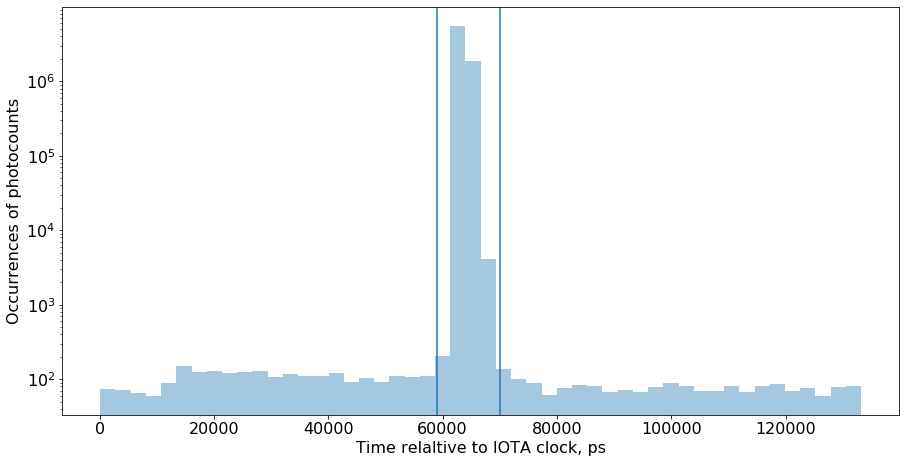

In [7]:
gate = (59000,70000)
plot_arrival_time_hist(t_delays,gate)

`events` is a 1D array, index = revolution number, value is 0 if no photocount, 1 if there was a photocount within the gate. If more than one photocount is present in the gate an exception will be raised, because the dead time is around 20 ns, so given that the gate is typically smaller than that, it is impossible to have more than one count within the gate.

In [8]:
events = get_events_array(df, n_revolutions, gate)
events

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [9]:
fanos, report = get_fanos(events, n_revolutions)

p_measured = 0.09945815675724491
chunck_length = 1500415
n_events = 7461428
fano_interval = (-0.09985903899921011, -0.09905859378905113)
fnao_interval_percentiles = (0.16, 0.84)
fano_median = -0.09960144360060363
fano_mean = -0.09945814991185767
absolute_fano_error = 0.00040022260507949214


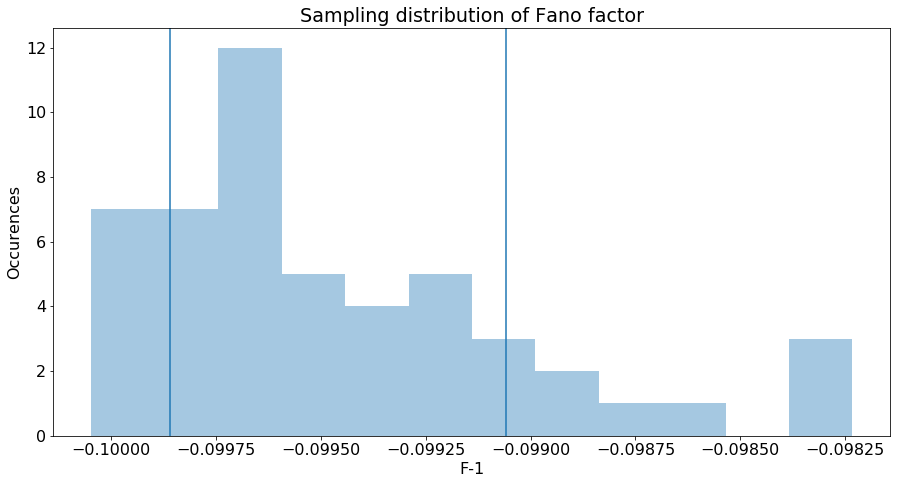

In [12]:
plot_fanos_hist(fanos, report['fano_interval'], bins=12)